# Построение классификаторов для рукописных цифр

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from skimage.transform import SimilarityTransform, warp

## Загрузка данных для классификации и разделение базы данных на выборки для обучения и тестирования

In [2]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

## GridSearchCV (Not augmented)

In [3]:
param_grid = {
    'n_neighbors': [5]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, verbose=10, n_jobs=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [5]}, verbose=10)

In [4]:
grid_search.best_params_

{'n_neighbors': 5}

In [5]:
cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=9)

array([0.92086331, 0.92259226, 0.93249325, 0.9189919 , 0.96039604,
       0.94509451, 0.97209721, 0.9819982 , 0.95409541])

## Аугментация

In [6]:
warped = [
    (warp(X_train, SimilarityTransform(translation=translation)) * 255).astype(int)
    for translation in [(28, 0), (1, 0), (-28, 0), (-1, 0)]
]

In [7]:
X_train_augmented = np.concatenate((X_train, *warped))
y_train_augmented = np.repeat(y_train, 5)

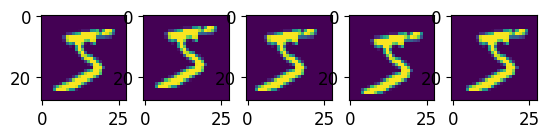

In [8]:
fig, ax = plt.subplots(1, 5)
for i in range(0, len(X_train_augmented), len(X_train)):
    ax[int(i / len(X_train))].imshow(X_train_augmented[i].reshape(28, 28))

## GridSearchCV (Augmented)

In [9]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, verbose=10, n_jobs=4)
grid_search.fit(X_train_augmented, y_train_augmented)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=9)